## EDA on Terrorism

## Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data and converting it into dataframe

In [2]:
df=pd.read_csv('C:/Users/sumit/OneDrive/Desktop/dataset/terrorism.csv', low_memory=False,encoding='latin1')

In [3]:
#Printing first 5 rows
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# Identification of Data types
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [5]:
#Checking rows and columns in the data
df.shape

(181691, 135)

In [6]:
#checking the columns 
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Cleaning the Data

In [7]:
#Getting the relevant columns from the data
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Duration','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','natlty1_txt':'Nationality','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','ishostkid':'Host'},inplace=True)
update_data = df[['Year','Month','Day','Duration','Country','Region','city','latitude','longitude','success','suicide','AttackType','Target','Nationality','Group','Motive','Weapon_type','Killed','Wounded','Summary','Target_type','Host']]
update_data['Total Affected']= update_data['Killed'] + update_data['Wounded']


C:\Users\sumit\AppData\Local\Temp/ipykernel_13236/1119392454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_data['Total Affected']= update_data['Killed'] + update_data['Wounded']


In [8]:
update_data.describe

<bound method NDFrame.describe of         Year  Month  Day  Duration             Country  \
0       1970      7    2         0  Dominican Republic   
1       1970      0    0         0              Mexico   
2       1970      1    0         0         Philippines   
3       1970      1    0         0              Greece   
4       1970      1    0         0               Japan   
...      ...    ...  ...       ...                 ...   
181686  2017     12   31         0             Somalia   
181687  2017     12   31         0               Syria   
181688  2017     12   31         0         Philippines   
181689  2017     12   31         0               India   
181690  2017     12   31         0         Philippines   

                             Region           city   latitude   longitude  \
0       Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                     North America    Mexico city  19.371887  -99.086624   
2                    Southeast Asia   

In [9]:
#Checking null values from the data
update_data.isnull().sum()

Year                   0
Month                  0
Day                    0
Duration               0
Country                0
Region                 0
city                 434
latitude            4556
longitude           4557
success                0
suicide                0
AttackType             0
Target               636
Nationality         1559
Group                  0
Motive            131130
Weapon_type            0
Killed             10313
Wounded            16311
Summary            66129
Target_type            0
Host                 178
Total Affected     16874
dtype: int64

In [10]:
#Top 10 affected by countries
pd.DataFrame(update_data["Country"].value_counts().head(10))

,Country
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235
Turkey,4292


## Overview of the data

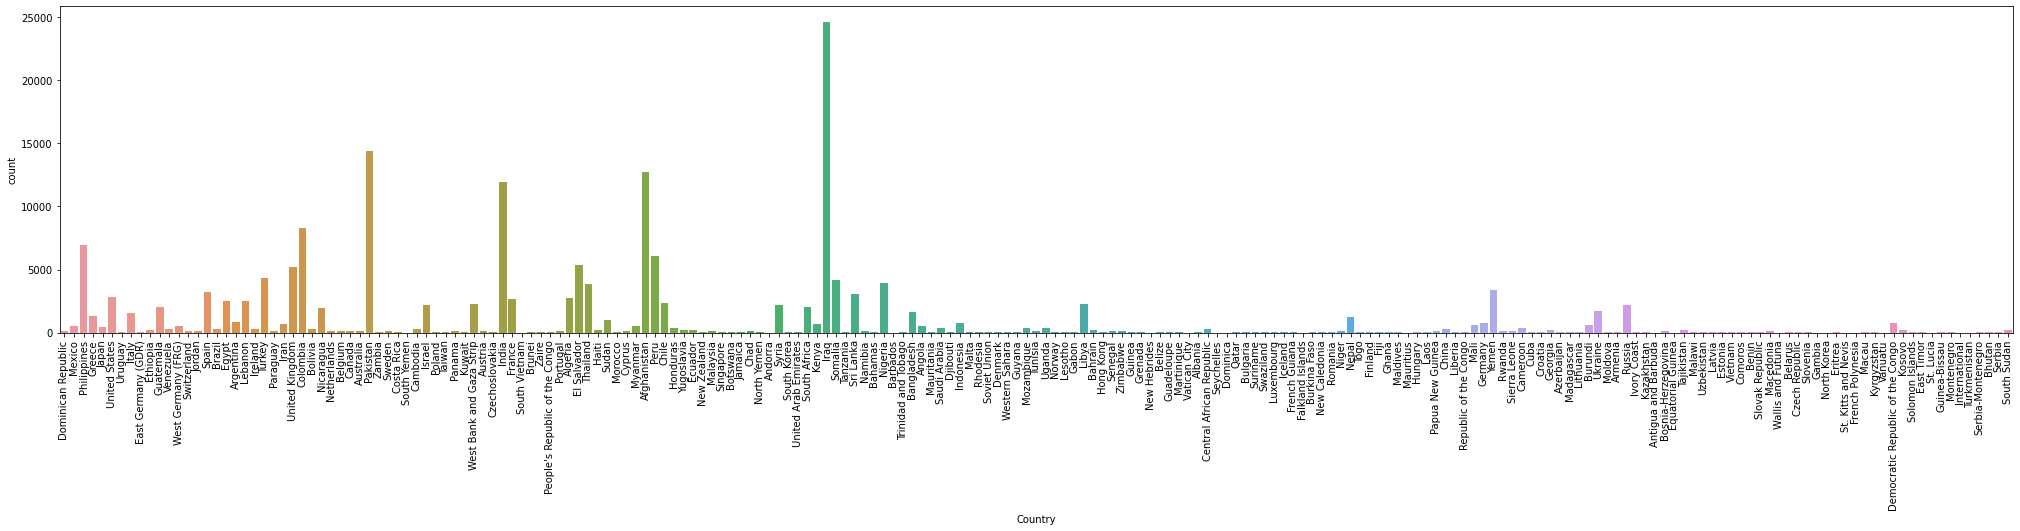

In [11]:
#Visualizing  countries
pd.DataFrame(update_data['Country'].value_counts().head(10))
plt.subplots(figsize=(35,6))
sns.countplot(x= update_data["Country"],data=update_data)
plt.xticks(rotation=90)
plt.show()

C:\Users\sumit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


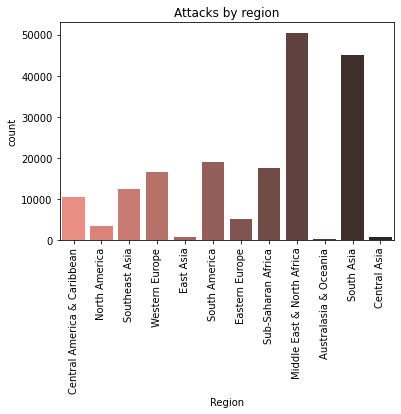

In [12]:
#Terrorism attacks be region
pd.DataFrame(update_data['Region'].value_counts())
sns.countplot('Region',data=update_data, palette='dark:salmon_r')
plt.title("Attacks by region")
plt.xticks(rotation=90)
plt.show()

## Most prone region to Terrorist attack is Middle east and North Africa

Text(0.5, 1.0, 'Year wise successful and unsuccessful attacks')

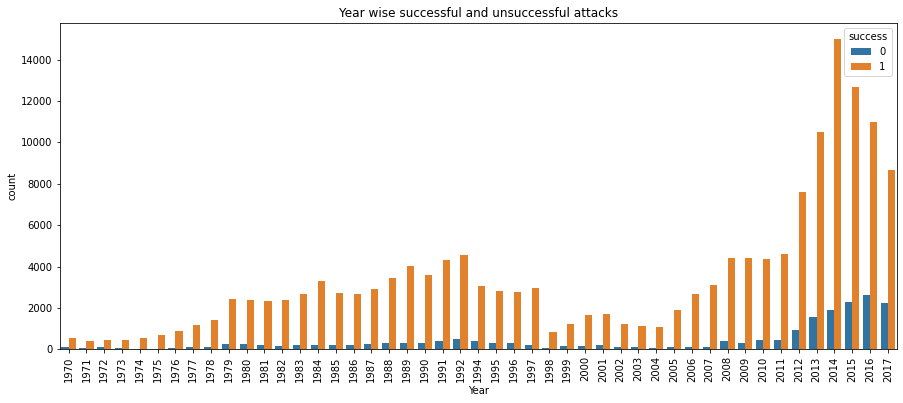

In [13]:
#Successful and unsuccessful attacks
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', hue='success', data=update_data)
plt.xticks(rotation=90)
plt.title('Year wise successful and unsuccessful attacks')

## Most number of attacks were from 2014

Text(0.5, 1.0, 'Top 10 Affected countries')

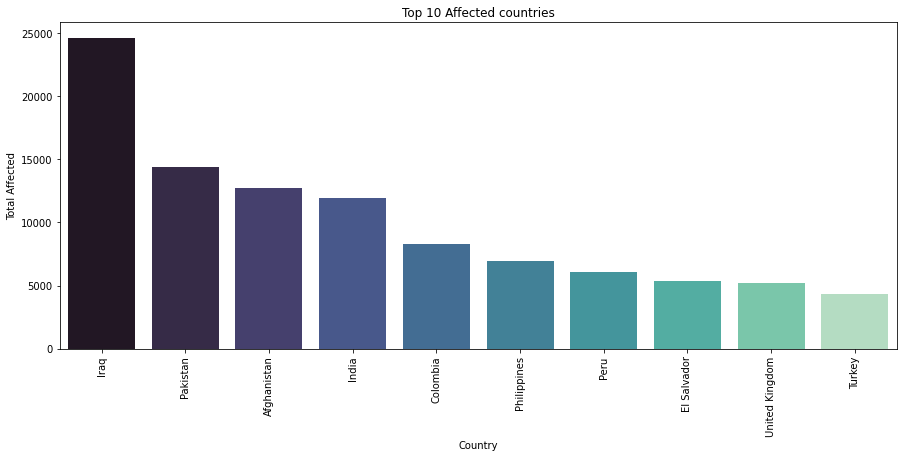

In [14]:
#Top 10 countries Affected
top_countries= update_data.Country.value_counts()[:10].reset_index()
top_countries.columns=["Country","Total Affected"]
plt.subplots(figsize=(15,6))
sns.barplot(x=top_countries.Country,y=top_countries["Total Affected"],palette='mako')
plt.xticks(rotation=90)
plt.title('Top 10 Affected countries')

## Iraq is the most affected country with most cases of total affected people

Text(0.5, 1.0, ' Top 10 Most Affected Cities')

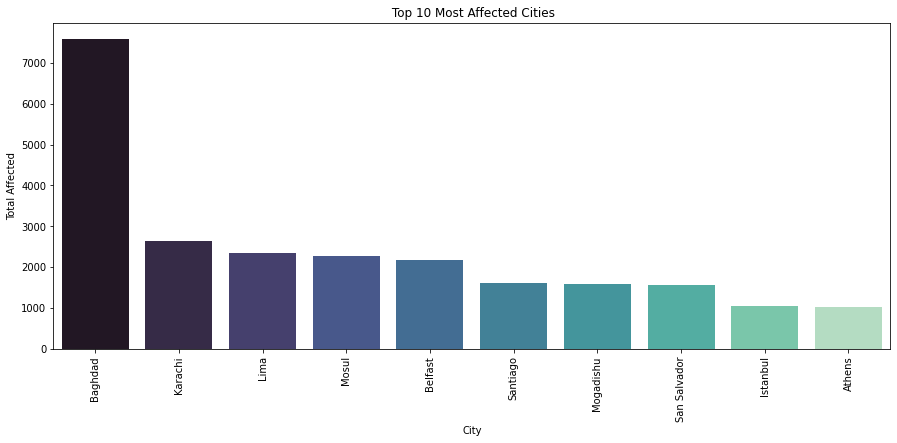

In [18]:
# Top 10 cities affected cities terrorism
top_cities= update_data.city.value_counts()[:11].drop('Unknown').reset_index()
top_cities.columns=["City","Total Affected"]
plt.subplots(figsize=(15,6))
sns.barplot(x=top_cities.City,y=top_cities["Total Affected"],palette='mako')
plt.xticks(rotation=90)
plt.title(' Top 10 Most Affected Cities')

## Baghdad is the epicenter for terrorism in the world

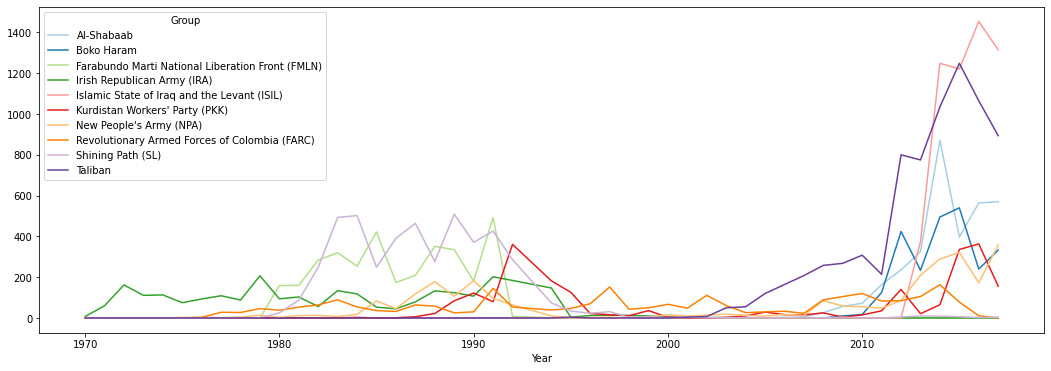

In [16]:
#Top Terrorist Groups
top_terror=update_data[update_data["Group"].isin(update_data["Group"].value_counts()[1:11].index)]
pd.crosstab(top_terror.Year,top_terror.Group).plot(color=sns.color_palette('Paired',10))
gp=plt.gcf()
gp.set_size_inches(18,6)

## Irish Republian Army is the oldest Terrorist group
## Islamic State of Iraq and the Levant has the most damage done by any Terrorist organization

Text(0.5, 1.0, 'Successful and Unsuccessful Attacks over the years')

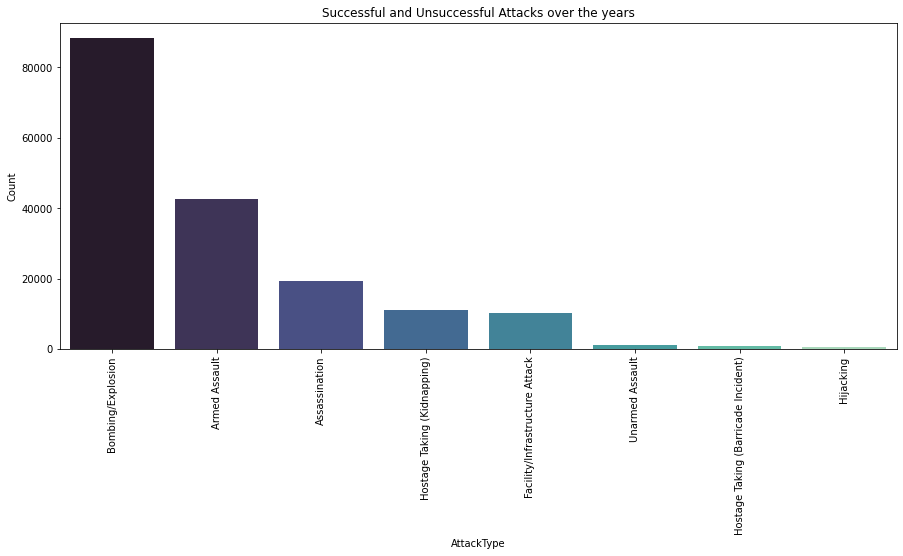

In [17]:
#Most popular type of attacks
attack_types= update_data.AttackType.value_counts()[:10].drop('Unknown').reset_index()
attack_types.columns=["AttackType","Count"]
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_types.AttackType,y=attack_types["Count"],palette='mako')
plt.xticks(rotation=90)
plt.title('Top 10 types of attack')

## Bombing/Explosion is the most common way used to attack people by Terrorist groups